In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
train = pd.read_csv('train_europe.csv')
test = pd.read_csv('test_europe.csv')

In [ ]:
train = train.drop(['2000', '2010', '2015', '2019'], axis=1)
test = test.drop(['2000', '2010', '2015', '2019'], axis=1)

In [ ]:
train.head()

Life Expectancy at birth   BMI  Alcohol  gender_dummy  \
0                     73.48  27.3    17.51             0   
1                     83.34  25.3     3.52             1   
2                     72.18  25.3    19.69             0   
3                     77.76  25.5     3.91             1   
4                     78.47  24.8     2.82             1   

   Infectious_and_parasitic_diseases  Respiratory_infectious  \
0                           0.062851                1.031266   
1                           0.005137                0.042678   
2                           0.038339                0.322622   
3                           0.214283                0.743131   
4                           0.098700                0.207885   

   neonatal_conditions  nutritional_deficiencies  \
0             0.073431                  0.019122   
1             0.001951                  0.001711   
2             0.023928                  0.003103   
3             0.139635                  0.083222   
4             0.051834                  0.003196   

   endocrine_blood_immune_disorders  cardiovascular_disease  ...  \
0                          0.070438                9.459635  ...   
1                          0.003970                0.329013  ...   
2                          0.029756                3.469974  ...   
3                          0.164662               33.451106  ...   
4                          0.035071               10.966049  ...   

   unintentional_injuries  intentional_injuries  mental_substance_disorders  \
0                1.158393              0.627783                    0.223101   
1                0.030100              0.009858                    0.006661   
2                0.579151              0.486499                    0.137355   
3                0.570312              0.436788                    0.111752   
4                0.317808              0.102183                    0.017118   

   sense_organ  musculoskeletal  congenital  sudden_infant_death_syndrome  \
0     0.118003         0.071643    0.083602                      0.000354   
1     0.000000         0.004019    0.002742                      0.000675   
2     0.000000         0.013737    0.032808                      0.000677   
3     0.000000         0.137538    0.078965                      0.004080   
4     0.000000         0.033133    0.046211                      0.001256   

   skin_diseases  diabetes_mellitus  oral_conditions  
0       0.000000           0.303662         0.035285  
1       0.000714           0.008731         0.000000  
2       0.008563           0.167339         0.000000  
3       0.070594           1.729422         0.000000  
4       0.008769           1.428151         0.000000  

[5 rows x 25 columns]

# Asia

In [ ]:
allcols = np.array(train.columns)

In [ ]:
X_train = train[allcols[1:]]
y_train = train[allcols[0]]

X_test = test[allcols[1:]]
y_test = test[allcols[0]]

In [ ]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

### Linear Regression

In [ ]:
train.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
X_train_linreg = sm.add_constant(X_train)
X_test_linreg = sm.add_constant(X_test)

linreg = sm.OLS(y_train, X_train_linreg).fit()
print(linreg.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at birth   R-squared:                       0.570
Model:                                  OLS   Adj. R-squared:                  0.514
Method:                       Least Squares   F-statistic:                     10.22
Date:                      Mon, 08 May 2023   Prob (F-statistic):           5.76e-23
Time:                              03:17:55   Log-Likelihood:                -593.69
No. Observations:                       210   AIC:                             1237.
Df Residuals:                           185   BIC:                             1321.
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
print('OSR2:', OSR2(linreg, X_test_linreg, y_test, y_train))

OSR2: 0.4010427922815576


### CART

In [ ]:
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

In [ ]:
d_tree_cv = DecisionTreeRegressor(ccp_alpha=0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88)
d_tree_cv.fit(X_train, y_train)

y_pred = d_tree_cv.predict(X_test)

In [ ]:
print('Node count =', d_tree_cv.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(d_tree_cv, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

Node count = 37


In [ ]:
importance = d_tree_cv.feature_importances_
len(importance)

24

In [ ]:
features = d_tree_cv.feature_names_in_

In [ ]:
for x, y in zip(features, importance):
  print(x, y)

BMI 0.025051746161241496
Alcohol 0.627520523431393
gender_dummy 0.0
Infectious_and_parasitic_diseases 0.0
Respiratory_infectious 0.0
neonatal_conditions 0.058840810777959364
nutritional_deficiencies 0.013596431671950238
endocrine_blood_immune_disorders 0.08869194312899209
cardiovascular_disease 0.0
respiratory_diseases 0.0
digestive_diseases 0.05596853783872557
genitourinary_diseases 0.0
malignant_neoplasms 0.0
neurological_conditions 0.007559517426988503
unintentional_injuries 0.0
intentional_injuries 0.03018542558089782
mental_substance_disorders 0.0
sense_organ 0.0
musculoskeletal 0.006806916812010385
congenital 0.03629228362538944
sudden_infant_death_syndrome 0.0
skin_diseases 0.0
diabetes_mellitus 0.02136183850922787
oral_conditions 0.028124025035224303


In [ ]:
def importance_plot(tree, X_train):
    
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot 
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance');


In [ ]:
print('OSR2:', OSR2(d_tree_cv, X_test, y_test, y_train))

OSR2: 0.5112565684897875


In [ ]:
importance_plot(d_tree_cv, X_train)

### Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('OSR2:', OSR2(rf, X_test, y_test, y_train))

OSR2: 0.7049956165167933


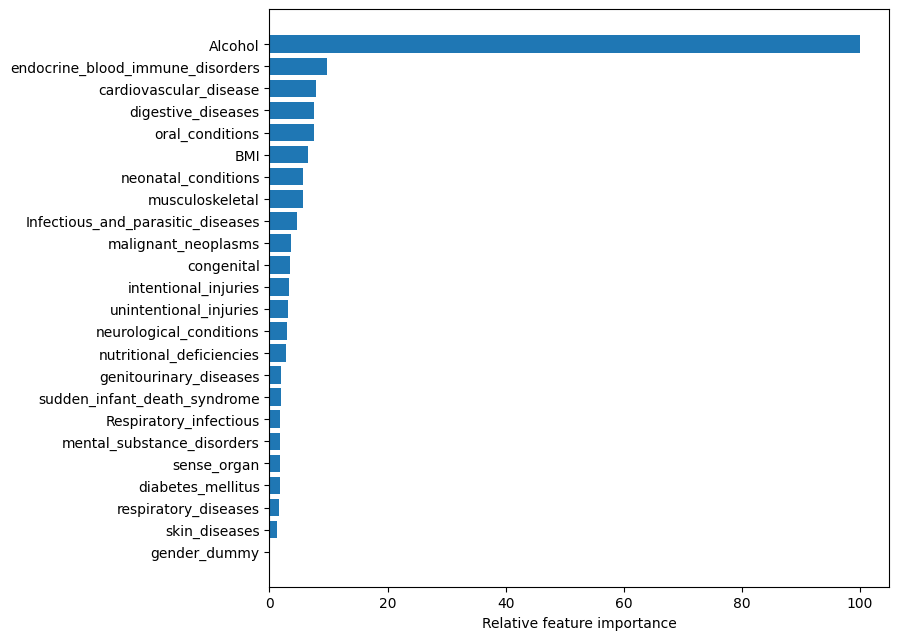

In [ ]:
importance_plot(rf, X_train)

In [ ]:
importances = pd.DataFrame(index=d_tree_cv.feature_names_in_)
importances['CART'] = d_tree_cv.feature_importances_
importances['RF'] = rf.feature_importances_

importances.sort_values(by=['RF'], ascending=False)

CART        RF
Alcohol                            0.627521  0.531343
endocrine_blood_immune_disorders   0.088692  0.052011
cardiovascular_disease             0.000000  0.041661
digestive_diseases                 0.055969  0.039973
oral_conditions                    0.028124  0.039921
BMI                                0.025052  0.034281
neonatal_conditions                0.058841  0.029870
musculoskeletal                    0.006807  0.029722
Infectious_and_parasitic_diseases  0.000000  0.024634
malignant_neoplasms                0.000000  0.019508
congenital                         0.036292  0.018563
intentional_injuries               0.030185  0.017155
unintentional_injuries             0.000000  0.016379
neurological_conditions            0.007560  0.016202
nutritional_deficiencies           0.013596  0.014727
genitourinary_diseases             0.000000  0.010511
sudden_infant_death_syndrome       0.000000  0.010017
Respiratory_infectious             0.000000  0.009523
mental_substance_disorders         0.000000  0.009431
sense_organ                        0.000000  0.009395
diabetes_mellitus                  0.021362  0.009171
respiratory_diseases               0.000000  0.008722
skin_diseases                      0.000000  0.007115
gender_dummy                       0.000000  0.000163